# What should I watch next?

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns

# import data from data folder
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')
# genome_scores = pd.read_csv('data/genome-scores.csv')
# genome_tags = pd.read_csv('data/genome-tags.csv')
# links = pd.read_csv('data/links.csv')

Check for null values

In [193]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [194]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Some feature engineering on movies

In [195]:
movies["genres"] = movies["genres"].apply(lambda x: x.split("|"))
movies["year"] = movies["title"].str.extract(r"\((\d{4})\)", expand=False)
movies["title"] = movies["title"].str.replace(r"\s\(\d{4}\)", "", regex=True)
movies["year"].fillna(0, inplace=True)
movies["year"] = movies["year"].astype(int)
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [196]:
# split the genre into one hot encodings
movies = movies.explode("genres")
movies = pd.get_dummies(movies, columns=["genres"], prefix="", prefix_sep="", dtype=int) 
# now group by movieId and title and sum the one hot encodings
movies = movies.groupby(["movieId", "title", "year"]).sum().reset_index()
movies.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
movies.describe()

,movieId,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,...,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000
mean,42200.353623,1991.951961,0.003490,0.187641,0.129645,0.062718,0.068158,0.385547,0.123075,0.045165,...,0.008930,0.100390,0.016218,0.034285,0.058817,0.163827,0.100595,0.194416,0.039212,0.017142
std,52160.494854,75.136918,0.058976,0.390445,0.335930,0.242468,0.252031,0.486749,0.328541,0.207677,...,0.094083,0.300535,0.126321,0.181968,0.235295,0.370137,0.300808,0.395771,0.194108,0.129808
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3248.250000,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7300.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76232.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,193609.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are 13 films missing their year, let's fix it manually.

In [198]:
# check for duplicates in movieId
movies["movieId"].duplicated().sum()
# there are duplicate titles (remakes, ...) but the movieId is unique

0

In [199]:
missing_year_titles = movies[movies["year"]==0]["title"]

movies[movies["title"].isin(missing_year_titles)]["movieId"].count() 
# indeed, there isn't a duplicate problem

13

In [200]:
missing_year_titles

6059                                            Babylon 5
9031                                     Ready Player One
9091                                           Hyena Road
9138    The Adventures of Sherlock Holmes and Doctor W...
9179                                    Nocturnal Animals
9259                                             Paterson
9367                                            Moonlight
9448                                               The OA
9514                                               Cosmos
9515                              Maria Bamford: Old Baby
9518                    Death Note: Desu nôto (2006–2007)
9525                                    Generation Iron 2
9611                                         Black Mirror
Name: title, dtype: object

In [201]:
missing_years={"Babylon 5": 1994,
    "Ready Player One": 2018,
    "Hyena Road": 2015,
    "The Adventures of Sherlock Holmes and Doctor Watson": 1980,
    "Nocturnal Animals": 2016,
    "Paterson": 2016,
    "Moonlight": 2016,
    "The OA": 2016,
    "Cosmos": 2015,
    "Maria Bamford: Old Baby": 2017,
    "Death Note: Desu nôto (2006–2007)": 2006,
    "Generation Iron 2": 2017,
    "Black Mirror": 2011
}


In [202]:
# add missing_years to the dataframe
for title, year in missing_years.items():
    movies.loc[movies["title"]==title, "year"] = year

In [203]:
movies[movies["title"].isin(missing_year_titles)]["year"]

6059    1994
9031    2018
9091    2015
9138    1980
9179    2016
9259    2016
9367    2016
9448    2016
9514    2015
9515    2017
9518    2006
9525    2017
9611    2011
Name: year, dtype: int32

Some statistics on movies


In [204]:
# add to movies the average rating, the total rating count
ratings_count = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
ratings_count.columns = ['movie_rating_count']
ratings_count['movie_average_rating'] = ratings.groupby('movieId')['rating'].mean()
movies = pd.merge(movies, ratings_count, left_on='movieId', right_index=True)
movies.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_rating_count,movie_average_rating
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,215,3.920930
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,110,3.431818
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,52,3.259615
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,7,2.357143
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,49,3.071429


<Axes: xlabel='rating', ylabel='Count'>

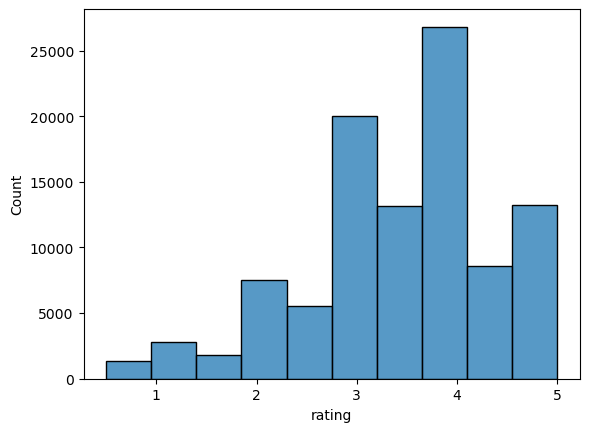

In [205]:
# ratings distribution
sns.histplot(ratings['rating'], bins=10)

In [206]:
# merge movies and ratings
movies_ratings = pd.merge(ratings, movies, on='movieId')
movies_ratings.head()

,userId,movieId,rating,timestamp,title,year,(no genres listed),Action,Adventure,Animation,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_rating_count,movie_average_rating
0,1,1,4.0,964982703,Toy Story,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,215,3.92093
1,5,1,4.0,847434962,Toy Story,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,215,3.92093
2,7,1,4.5,1106635946,Toy Story,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,215,3.92093
3,15,1,2.5,1510577970,Toy Story,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,215,3.92093
4,17,1,4.5,1305696483,Toy Story,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,215,3.92093


In [207]:
users = ratings['userId'].unique()
users = pd.DataFrame(users, columns=['userId'])
users["user_rating_count"] = users["userId"].apply(lambda x: ratings[ratings["userId"] == x].shape[0])
users["user_average_rating"] = users["userId"].apply(lambda x: ratings[ratings["userId"] == x]["rating"].mean())
users.head(10)

,userId,user_rating_count,user_average_rating
0,1,232,4.366379
1,2,29,3.948276
2,3,39,2.435897
3,4,216,3.555556
4,5,44,3.636364
5,6,314,3.493631
6,7,152,3.230263
7,8,47,3.574468
8,9,46,3.260870
9,10,140,3.278571


In [208]:
# merge this user info
movies_ratings_users = pd.merge(movies_ratings, users, on='userId')

In [209]:
movies_ratings_users.head()

,userId,movieId,rating,timestamp,title,year,(no genres listed),Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_rating_count,movie_average_rating,user_rating_count,user_average_rating
0,1,1,4.0,964982703,Toy Story,1995,0,0,1,1,...,0,0,0,0,0,0,215,3.920930,232,4.366379
1,1,3,4.0,964981247,Grumpier Old Men,1995,0,0,0,0,...,0,1,0,0,0,0,52,3.259615,232,4.366379
2,1,6,4.0,964982224,Heat,1995,0,1,0,0,...,0,0,0,1,0,0,102,3.946078,232,4.366379
3,1,47,5.0,964983815,Seven (a.k.a. Se7en),1995,0,0,0,0,...,1,0,0,1,0,0,203,3.975369,232,4.366379
4,1,50,5.0,964982931,"Usual Suspects, The",1995,0,0,0,0,...,1,0,0,1,0,0,204,4.237745,232,4.366379


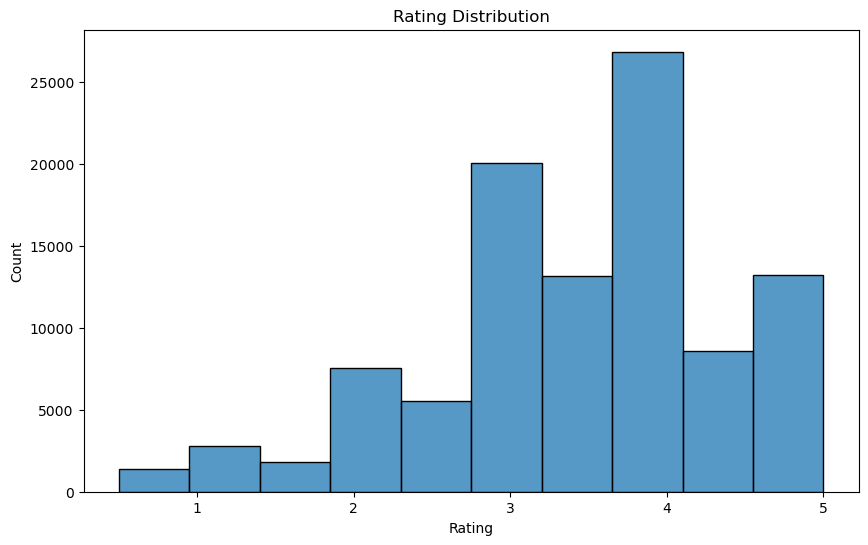

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Store the datasets

In [213]:
# save in csv
movies.to_csv('tmp/movies.csv', index=False)
ratings.to_csv('tmp/ratings.csv', index=False)
users.to_csv('tmp/users.csv', index=False)
movies_ratings.to_csv('tmp/movies_ratings.csv', index=False)
movies_ratings_users.to_csv('tmp/movies_ratings_users.csv', index=False)